In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os.path as op
from pprint import pprint as pp



In [3]:
datapath = "~/teigen_data/output_rows.csv"

In [63]:
plotkw ={
    "figsize": [9, 6], 
    # "fontsize": 14
}

In [74]:
df = pd.read_csv(op.expanduser(datapath))
pp(df.keys())
df

# df

Index([u'datetime', u'note', u'length [mm]', u'volume [mm^3]',
       u'surface [mm^2]', u'area volume [mm^3]', u'count []',
       u'numeric volume [mm^3]', u'numeric surface [mm^2]',
       u'length d. [mm^-2]', u'volume d. []', u'surface d. [mm^-1]',
       u'appearance show_surface', u'areasampling areasize_mm',
       u'areasampling areasize_px', u'areasampling voxelsize_mm',
       u'filepattern', u'generator_id',
       u'generators Cylinder continues element_number',
       u'generators Cylinder continues fixed_radius_distribution',
       u'generators Cylinder continues intensity_profile_intensity',
       u'generators Cylinder continues intensity_profile_radius',
       u'generators Cylinder continues normal_radius_distribution',
       u'generators Cylinder continues radius_distribution_maximum',
       u'generators Cylinder continues radius_distribution_mean',
       u'generators Cylinder continues radius_distribution_minimum',
       u'generators Cylinder continues radius_

,datetime,note,length [mm],volume [mm^3],surface [mm^2],area volume [mm^3],count [],numeric volume [mm^3],numeric surface [mm^2],length d. [mm^-2],...,postprocessing measurement_multiplier,postprocessing measurement_resolution,postprocessing negative,postprocessing noise_amplitude,postprocessing noise_mean,postprocessing noise_preview,postprocessing noise_random_generator_seed,postprocessing output_dtype,postprocessing surface_measurement,required_teigen_version
0,2017-04-19T14:37:40.861429,NaN,256.826885,53205.891456,19378.441193,1716000,20,52204.225268,19247.270565,0.000150,...,-1,20,False,40,30,False,0,uint8,False,0.2.17
1,2017-04-19T14:38:42.234488,NaN,256.826885,53205.891456,19378.441193,1716000,20,52204.225268,19247.270565,0.000150,...,-1,20,False,40,30,False,0,uint8,False,0.2.17
2,2017-04-19T14:42:07.946006,NaN,256.826885,53205.891456,19378.441193,1716000,20,49301.353161,18851.813858,0.000150,...,-1,10,False,40,30,False,0,uint8,False,0.2.17
3,2017-04-19T14:51:59.992722,NaN,256.826885,53205.891456,19378.441193,1716000,20,38396.893652,17354.768357,0.000150,...,-1,5,False,40,30,False,0,uint8,False,0.2.17
4,2017-04-19T14:52:25.621267,NaN,256.826885,53205.891456,19378.441193,1716000,20,45353.047764,18333.728391,0.000150,...,-1,7,False,40,30,False,0,uint8,False,0.2.17
5,2017-04-19T14:52:56.225398,NaN,256.826885,53205.891456,19378.441193,1716000,20,50855.319545,19065.435560,0.000150,...,-1,13,False,40,30,False,0,uint8,False,0.2.17
6,2017-04-19T14:53:46.240126,NaN,256.826885,53205.891456,19378.441193,1716000,20,51894.565555,19198.017152,0.000150,...,-1,17,False,40,30,False,0,uint8,False,0.2.17
7,2017-04-19T15:08:04.033962,NaN,256.826885,53205.891456,19378.441193,1716000,20,42625.438685,17931.361104,0.000150,...,-1,6,False,40,30,False,0,uint8,False,0.2.17
8,2017-04-19T15:08:44.441612,NaN,256.826885,53205.891456,19378.441193,1716000,20,47153.074573,18534.526112,0.000150,...,-1,8,False,40,30,False,0,uint8,False,0.2.17
9,2017-04-19T15:09:05.002401,NaN,256.826885,53205.891456,19378.441193,1716000,20,48547.146188,18744.077589,0.000150,...,-1,9,False,40,30,False,0,uint8,False,0.2.17


# Numeric measurement precision (element_numer = 20, length_mean = 15)

,surface error [%],volume error [%],measurement_resolution
3,10.442908,27.833380,5
7,7.467474,19.885867,6
4,5.391109,14.759350,7
8,4.354917,11.376216,8
9,3.273553,8.756070,9
2,2.717594,7.338545,10
10,2.221115,6.071832,11
5,1.615226,4.417879,13
6,0.931055,2.464625,17
0,0.676889,1.882623,20


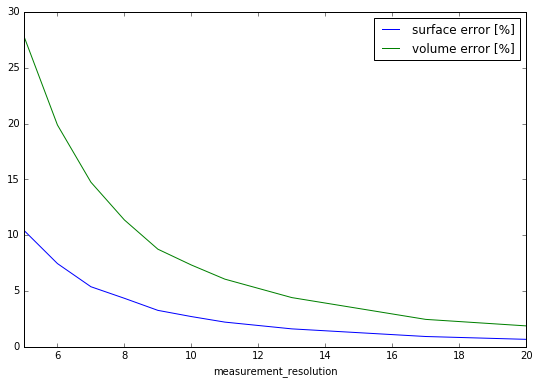

In [71]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["generators Unconnected cylinders length_distribution_mean"] == 15
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort("measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
dfsp

In [ ]:
## element_number = 10, 

,surface error [%],volume error [%],measurement_resolution
17,10.352215,27.661293,5
23,7.281398,19.108472,6
18,5.323389,14.667218,7
24,4.287650,11.303706,8
19,3.280626,9.026255,9
11,2.164630,6.152171,11
20,1.593632,4.398056,13
21,0.937731,2.580117,17
16,0.665480,1.789696,20
22,0.433023,1.196441,25


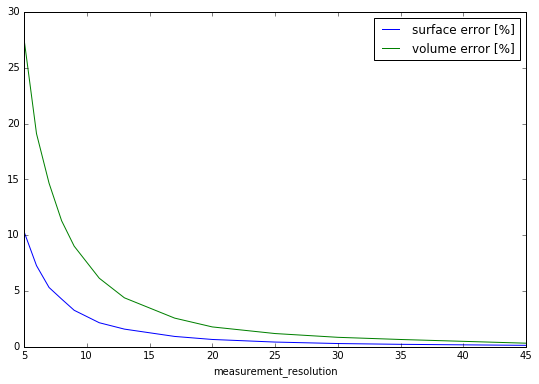

In [72]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
dfs = df[
    df["generators Unconnected cylinders length_distribution_mean"] == 17
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["surface error [%]", "volume error [%]", "measurement_resolution"]].sort("measurement_resolution")
dfsp.plot(
    x="measurement_resolution", **plotkw)
dfsp

# Numeric and analytic error

![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20](id26en40lm40rm5mr20.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=20
![element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10](id26en40lm40rm5mr10.png)
element_number=40, length_mean=40, radius_mean=5, measurement_resolution=10

## measurement_resolution = 20

In [99]:
df = pd.read_csv(op.expanduser(datapath))
df["surface error [mm^2]"] = np.abs(df["numeric surface [mm^2]"] - df["surface [mm^2]"])
df["surface error [%]"] = df["surface error [mm^2]"] / df["surface [mm^2]"] * 100
df["volume error [mm^3]"] = np.abs(df["numeric volume [mm^3]"] - df["volume [mm^3]"])
df["volume error [%]"] = df["volume error [mm^3]"] / df["volume [mm^3]"] * 100
df["measurement_resolution"] = df["postprocessing measurement_resolution"]
df["element_number"] = df["generators Unconnected cylinders element_number"]
df["length_distribution_mean"] = df["generators Unconnected cylinders radius_distribution_mean"]
df["radius_distribution_mean"] = df["generators Unconnected cylinders length_distribution_mean"]
dfs = df[
    df["measurement_resolution"] == 20
    # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
dfsp = dfs[["volume [mm^3]", "numeric volume [mm^3]", "surface [mm^2]", "numeric surface [mm^2]", "surface error [%]", "volume error [%]", "element_number", "length_distribution_mean", "radius_distribution_mean"]]
dfsp

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%],element_number,length_distribution_mean,radius_distribution_mean
0,53205.891456,52204.225268,19378.441193,19247.270565,0.676889,1.882623,20,5,15
1,53205.891456,52204.225268,19378.441193,19247.270565,0.676889,1.882623,20,5,15
16,27097.787508,26612.819582,9979.153884,9912.744644,0.665480,1.789696,10,5,17
25,103616.834879,101748.794671,37762.707853,37537.039597,0.597596,1.802835,30,5,40
26,111754.078328,109741.340171,43253.466132,42998.821069,0.588728,1.801042,40,5,40
28,65674.996301,64497.632209,22397.574793,22266.526539,0.585100,1.792713,15,5,40
29,88224.852458,86635.300437,32151.614642,31960.195255,0.595365,1.801706,25,5,40
30,107615.287314,105676.138281,40264.535468,40025.118293,0.594611,1.801927,35,5,40
31,109360.937550,107449.471743,40257.780561,40031.125228,0.563010,1.747851,30,5,60
32,115202.868612,113204.722006,41376.688540,41141.187400,0.569164,1.734459,30,20,50


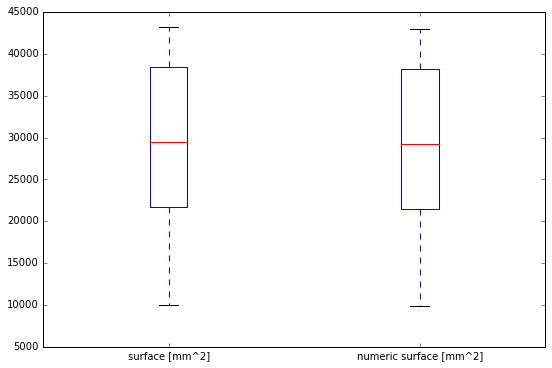

In [100]:

axp = dfsp[["surface [mm^2]", "numeric surface [mm^2]"]].plot(kind="box", **plotkw)

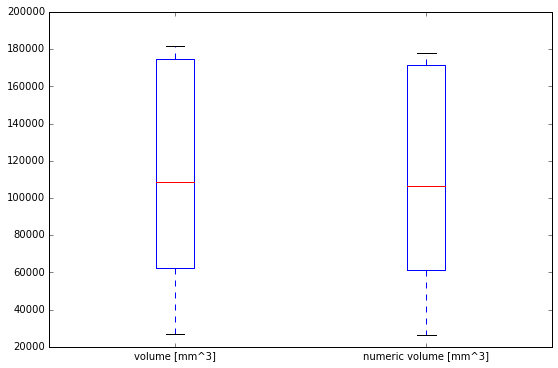

In [102]:
axp = dfsp[["volume [mm^3]", "numeric volume [mm^3]"]].plot(kind="box", **plotkw)

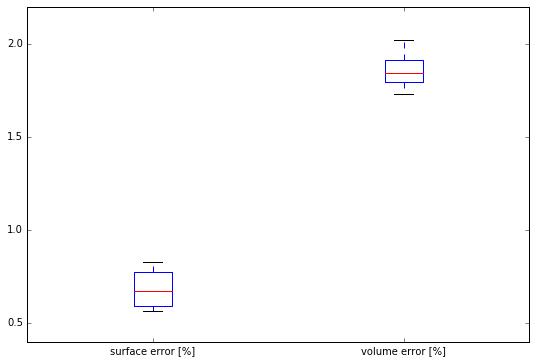

In [103]:
axp = dfsp[["surface error [%]", "volume error [%]"]].plot(kind="box", **plotkw)

In [104]:
dfsp.describe()

,volume [mm^3],numeric volume [mm^3],surface [mm^2],numeric surface [mm^2],surface error [%],volume error [%],element_number,length_distribution_mean,radius_distribution_mean
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,110764.685951,108674.554187,29035.486564,28842.767240,0.675611,1.862225,25.375000,12.500000,31.187500
std,52541.472845,51477.223721,9693.953094,9644.252151,0.097801,0.092918,8.293572,9.128709,16.042522
min,27097.787508,26612.819582,9979.153884,9912.744644,0.563010,1.734459,10.000000,5.000000,10.000000
25%,62557.720090,61424.280474,21642.791393,21511.712546,0.593140,1.798960,20.000000,5.000000,15.000000
50%,108488.112432,106562.805012,29519.656039,29277.287541,0.671185,1.842729,24.000000,5.000000,40.000000
75%,174789.696505,171258.270460,38386.476030,38159.059271,0.776375,1.913904,31.000000,21.250000,40.000000
max,181581.731715,178139.714009,43253.466132,42998.821069,0.831531,2.020386,40.000000,25.000000,60.000000
